### Project Report: Analysis and Prediction of Household Power Consumption

#### Overview
This project focuses on analyzing and predicting household electricity consumption using a real-world dataset from the UCI Machine Learning Repository ("Individual Household Electric Power Consumption"). The dataset contains minute-by-minute measurements of power usage, including global active power, voltage, and sub-metering data (kitchen, laundry, and HVAC systems) for a household. The objective was to explore energy consumption patterns, visualize key trends, and build a predictive model using Python.

#### Methodology
1. **Data Preparation:**
   - The dataset (`household_power_consumption.txt`) was loaded using Pandas, with proper handling of missing values (`'?'` replaced with NaN) and conversion of numeric columns to float types.
   - A `DateTime` index was created by combining the `Date` and `Time` columns, parsed in `DD/MM/YYYY HH:MM:SS` format with `dayfirst=True`.

2. **Data Selection:**
   - Data for December 16, 2006, was extracted for analysis. A fallback mechanism ensures the first available day is used if the specified date is missing.

3. **Exploratory Analysis:**
   - Key statistics were calculated for the selected day, including average and maximum global active power, and total energy usage for sub-metering categories.

4. **Visualization:**
   - **Plot 1:** A line chart of global active power over time (hours of the day), highlighting consumption trends.
   - **Plot 2:** A multi-line chart comparing energy usage across sub-metering categories (kitchen, laundry, HVAC).
   - **Plot 3:** A scatter plot with a regression line comparing actual vs. predicted power consumption.

5. **Predictive Modeling:**
   - A linear regression model was trained using time (minutes since midnight) as the feature and global active power as the target.
   - The dataset was split into 80% training and 20% testing sets, and the model’s performance was evaluated using Mean Squared Error (MSE).

#### Results
- **Daily Summary (December 16, 2006):**
  - Average Global Active Power: 3.05 kW
  - Maximum Global Active Power: 7.71 kW
  - Total Sub_metering_1 (Kitchen): 0.00 Wh
  - Total Sub_metering_2 (Laundry): 546.00 Wh
  - Total Sub_metering_3 (HVAC): 4926.00 Wh
- **Visualization Insights:**
  - The global active power plot shows fluctuations throughout the day, with peaks likely corresponding to high-demand periods.
  - Sub-metering analysis reveals that HVAC systems (Sub_metering_3) dominate energy usage, contributing 4926 Wh, while the kitchen (Sub_metering_1) shows negligible consumption (0 Wh), and laundry (Sub_metering_2) accounts for 546 Wh.
- **Prediction Performance:**
  - The linear regression model achieved an MSE of 0.6531, indicating moderate accuracy in predicting power consumption based on time alone. The actual vs. predicted plot shows a reasonable fit, though some variability remains unexplained.

#### Conclusion
This project demonstrates the application of data science techniques to energy management, a field relevant to accounting, economics, and digital skills. The analysis highlights the dominance of HVAC systems in household energy use, offering insights for cost optimization or energy efficiency strategies. The predictive model, while simple, provides a foundation for forecasting power needs, which could be enhanced with additional features (e.g., voltage, sub-metering data) or more advanced algorithms (e.g., Random Forest).

#### Tools and Skills
- **Python Libraries:** Pandas (data manipulation), Matplotlib/Seaborn (visualization), Scikit-learn (machine learning).
- **Skills Demonstrated:** Data cleaning, exploratory data analysis, time-series visualization, and basic predictive modeling.

#### Future Improvements
- Incorporate additional features (e.g., voltage, weather data) to improve prediction accuracy.
- Extend the analysis to multiple days or months for broader trends.
- Experiment with advanced models like ARIMA or neural networks for time-series forecasting.


In [4]:
!wget https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip

--2025-03-27 18:02:22--  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘individual+household+electric+power+consumption.zip’

individual+househol     [         <=>        ]  19.68M   587KB/s    in 37s     

2025-03-27 18:03:00 (539 KB/s) - ‘individual+household+electric+power+consumption.zip’ saved [20640916]



In [5]:
!unzip /content/individual+household+electric+power+consumption.zip

Archive:  /content/individual+household+electric+power+consumption.zip
  inflating: household_power_consumption.txt  


First few dates in the dataset:
DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00'],
              dtype='datetime64[ns]', name='DateTime', freq=None)
Using date: 2006-12-16

Daily Summary:
Average Global Active Power: 3.05 kW
Max Global Active Power: 7.71 kW
Total Sub_metering_1: 0.00 Wh
Total Sub_metering_2: 546.00 Wh
Total Sub_metering_3: 4926.00 Wh


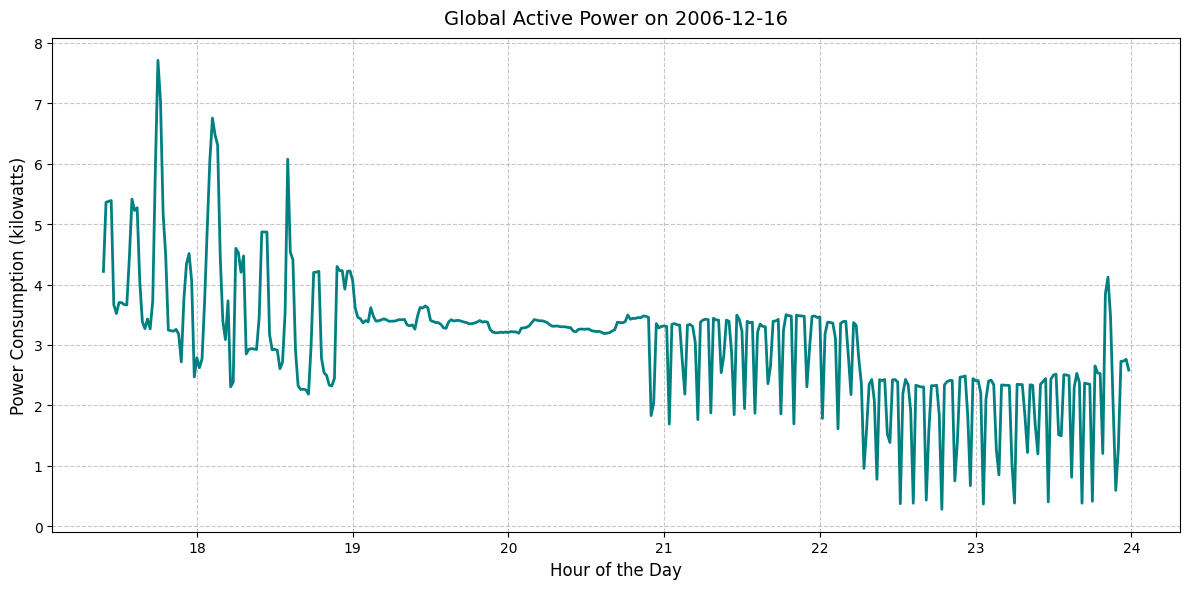

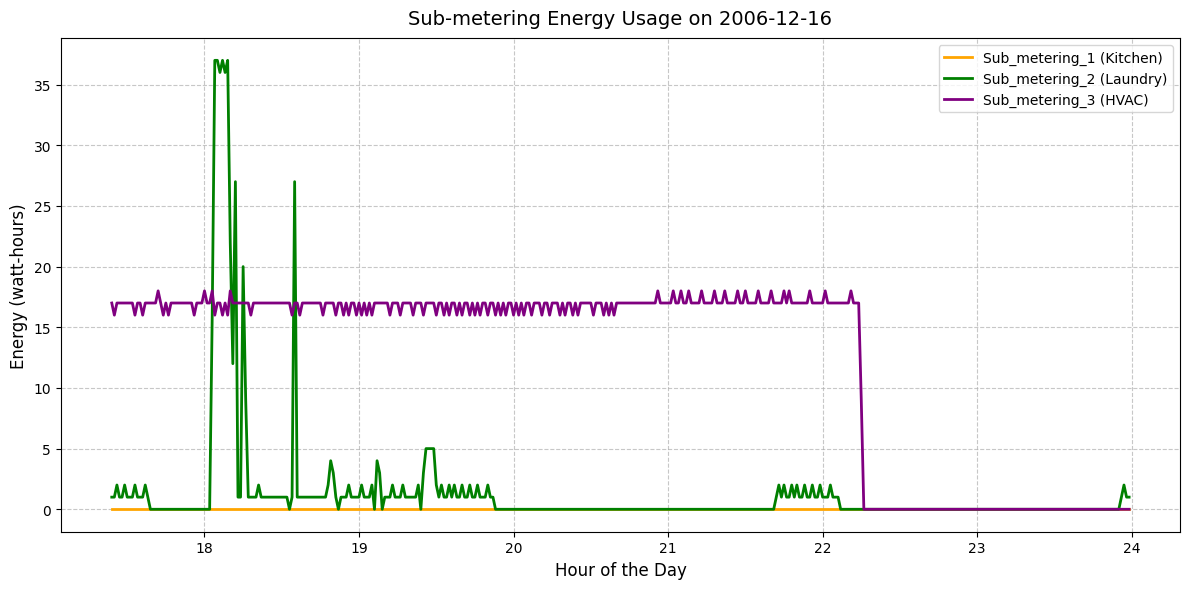

<ipython-input-10-d185b2f2f98e>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.loc[:, 'Minutes'] = (daily_data.index.hour * 60) + daily_data.index.minute


Mean Squared Error (MSE): 0.6531


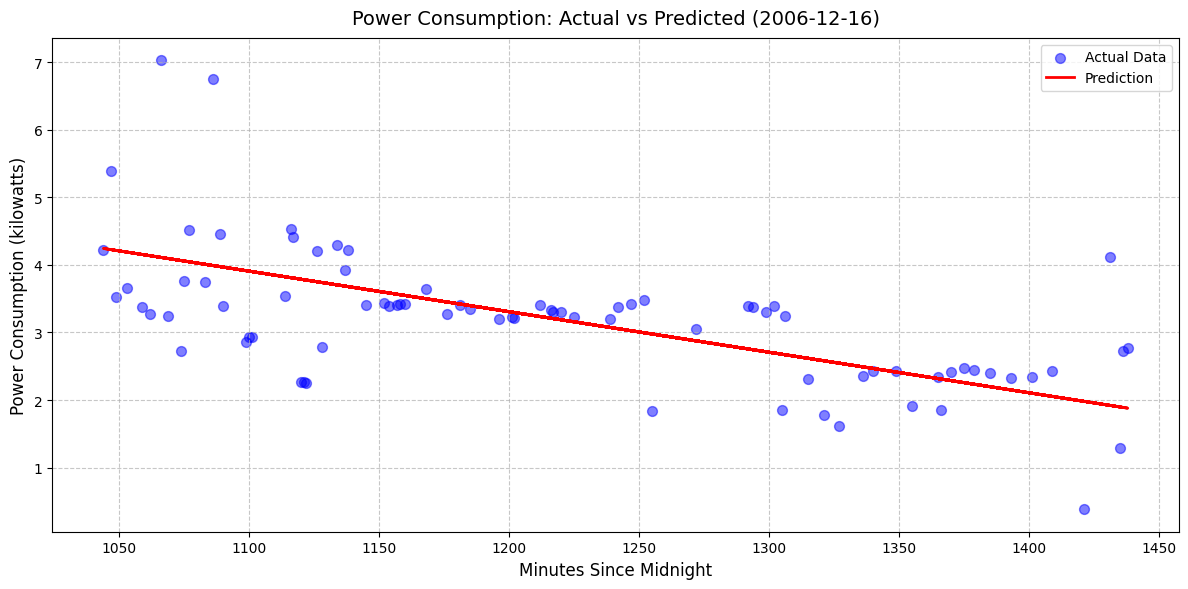

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
data = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

# Step 2: Clean the data
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Convert numeric columns to float
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Create DateTime column and set as index
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)
data.set_index('DateTime', inplace=True)

# Debug: Print first few dates to check the format and availability
print("First few dates in the dataset:")
print(data.index[:5])

# Step 3: Select data for a specific day
desired_date = pd.to_datetime('2006-12-16').date()  # Define the desired date
daily_data = data[data.index.date == desired_date]  # Filter by date

# Check if the desired date exists, otherwise use the first available day
if daily_data.empty:
    print(f"Date '2006-12-16' not found. Using the first available day instead.")
    first_date = data.index[0].date()
    daily_data = data[data.index.date == first_date]
    print(f"Using date: {first_date}")
else:
    print(f"Using date: {desired_date}")

# Step 4: Basic analysis
print("\nDaily Summary:")
print(f"Average Global Active Power: {daily_data['Global_active_power'].mean():.2f} kW")
print(f"Max Global Active Power: {daily_data['Global_active_power'].max():.2f} kW")
print(f"Total Sub_metering_1: {daily_data['Sub_metering_1'].sum():.2f} Wh")
print(f"Total Sub_metering_2: {daily_data['Sub_metering_2'].sum():.2f} Wh")
print(f"Total Sub_metering_3: {daily_data['Sub_metering_3'].sum():.2f} Wh")

# Step 5: Plot 1 - Global Active Power over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data.index.hour + daily_data.index.minute / 60,
             y=daily_data['Global_active_power'],
             color='teal', linewidth=2)
plt.title(f'Global Active Power on {daily_data.index[0].date()}', fontsize=14, pad=10)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Power Consumption (kilowatts)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 6: Plot 2 - Sub-metering comparison
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index.hour + daily_data.index.minute / 60, daily_data['Sub_metering_1'],
         label='Sub_metering_1 (Kitchen)', color='orange', linewidth=2)
plt.plot(daily_data.index.hour + daily_data.index.minute / 60, daily_data['Sub_metering_2'],
         label='Sub_metering_2 (Laundry)', color='green', linewidth=2)
plt.plot(daily_data.index.hour + daily_data.index.minute / 60, daily_data['Sub_metering_3'],
         label='Sub_metering_3 (HVAC)', color='purple', linewidth=2)
plt.title(f'Sub-metering Energy Usage on {daily_data.index[0].date()}', fontsize=14, pad=10)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Energy (watt-hours)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 7: Prepare data for prediction
# Use .loc to avoid SettingWithCopyWarning
daily_data.loc[:, 'Minutes'] = (daily_data.index.hour * 60) + daily_data.index.minute
X = daily_data[['Minutes']]  # Feature
y = daily_data['Global_active_power']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Step 9: Plot 3 - Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data', s=50)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title(f'Power Consumption: Actual vs Predicted ({daily_data.index[0].date()})', fontsize=14, pad=10)
plt.xlabel('Minutes Since Midnight', fontsize=12)
plt.ylabel('Power Consumption (kilowatts)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()